# Auto encoder **AE**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import time as time

## Load MNIST

In [6]:
train_df = pd.read_csv('../data/mnist_train.csv')
test_df = pd.read_csv('../data/mnist_test.csv')

In [10]:
data = train_df.iloc[:, 1:].values
labels = train_df.iloc[:, 0].values

In [11]:
type(data)

numpy.ndarray

In [12]:
dataT = torch.tensor(data, dtype=torch.float32)
labelsT = torch.tensor(labels, dtype=torch.long)

In [15]:
train_dataset = TensorDataset(dataT, labelsT)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
test_data = test_df.iloc[:, 1:].values  
test_labels = test_df.iloc[:, 0].values
test_dataset = TensorDataset(torch.tensor(test_data, dtype=torch.float32), torch.tensor(test_labels, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=test_labels.shape[0], shuffle=True)

## Create the model

In [47]:
def createMNISTAutoEncoder():

    class MNIST_Autoencoder(nn.Module):
        def __init__(self):
            super(MNIST_Autoencoder, self).__init__()
            self.input = nn.Linear(784, 250)
            self.enc = nn.Linear(250, 50)
            self.lat = nn.Linear(50, 250)
            self.dec = nn.Linear(250, 784)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.enc(x))
            x = F.relu(self.lat(x))
            x = F.sigmoid(self.dec(x))
            return x    

    net = MNIST_Autoencoder()

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    return net, loss_fn, optimizer

In [48]:
net , loss_fn, optimizer = createMNISTAutoEncoder()

In [49]:
X = dataT[:5, :]
y_hat = net(X)
y_hat.shape

torch.Size([5, 784])

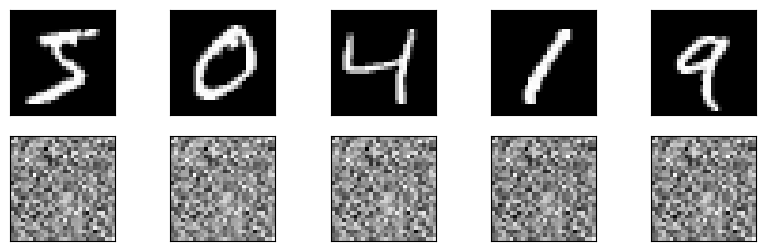

In [50]:
# See what the model did
fig,axs = plt.subplots(2, 5,figsize=(10,3))
for i in range(5):
    axs[0, i].imshow(X[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(y_hat[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

plt.show()    


## Training

In [51]:
def function2TrainModel(net, loss_fn, optimizer, train_loader, epochs=100):
    losses = torch.zeros(epochs)
    for epoch in range(epochs):
        for X,y in train_loader:
            y_hat = net(X)
            loss = loss_fn(y_hat, X)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses[epoch] = loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {losses[epoch]}')
    return losses,net

In [73]:
lossses, net = function2TrainModel(net, loss_fn, optimizer, train_loader, epochs=1000)

Epoch 1/1000, Loss: 0.005821915343403816
Epoch 2/1000, Loss: 0.005326762329787016
Epoch 3/1000, Loss: 0.005322436802089214
Epoch 4/1000, Loss: 0.007043356075882912
Epoch 5/1000, Loss: 0.0052258772775530815
Epoch 6/1000, Loss: 0.004742309916764498
Epoch 7/1000, Loss: 0.00592455081641674
Epoch 8/1000, Loss: 0.004928306210786104
Epoch 9/1000, Loss: 0.005630104336887598
Epoch 10/1000, Loss: 0.005739771761000156
Epoch 11/1000, Loss: 0.004877254832535982
Epoch 12/1000, Loss: 0.0047860946506261826
Epoch 13/1000, Loss: 0.0041732387617230415
Epoch 14/1000, Loss: 0.005345391575247049
Epoch 15/1000, Loss: 0.005339052062481642
Epoch 16/1000, Loss: 0.005033000838011503
Epoch 17/1000, Loss: 0.004299649503082037
Epoch 18/1000, Loss: 0.004495376721024513
Epoch 19/1000, Loss: 0.0052547515369951725
Epoch 20/1000, Loss: 0.004770494066178799
Epoch 21/1000, Loss: 0.004879928193986416
Epoch 22/1000, Loss: 0.005039260257035494
Epoch 23/1000, Loss: 0.005236493889242411
Epoch 24/1000, Loss: 0.00564407370984554

tensor([[5.6587e-01, 2.8344e-01, 4.6322e-02,  ..., 2.7677e-01, 5.8366e-02,
         3.2255e-01],
        [5.3880e-01, 9.9006e-01, 8.1237e-01,  ..., 9.3285e-01, 4.3747e-01,
         7.1932e-01],
        [4.1118e-01, 1.7471e-01, 4.4153e-01,  ..., 6.6749e-01, 1.9688e-01,
         1.3891e-01],
        ...,
        [2.6438e-01, 1.8656e-01, 9.0905e-01,  ..., 7.1347e-01, 6.3224e-02,
         1.2174e-01],
        [3.8047e-01, 5.6892e-01, 1.6065e-01,  ..., 4.1853e-01, 7.8766e-01,
         4.5826e-01],
        [6.6161e-01, 2.7037e-01, 5.8180e-04,  ..., 3.7867e-01, 4.5008e-01,
         2.2181e-01]])


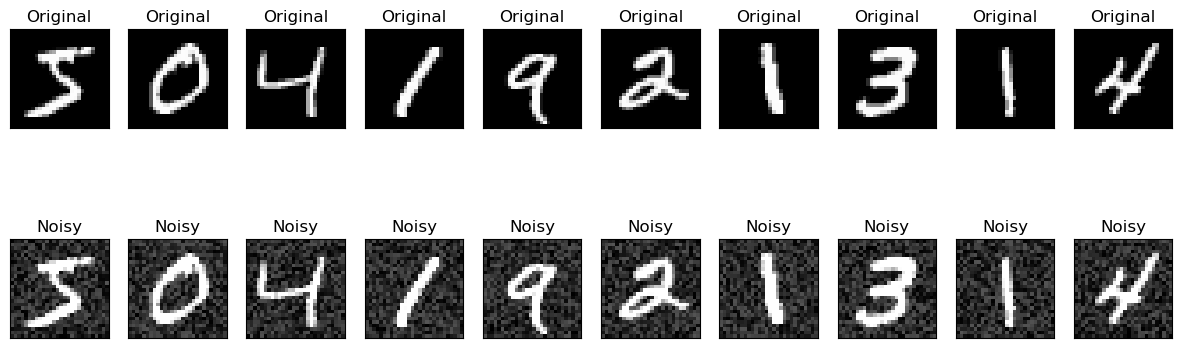

In [106]:
X = dataT[:10, :]
# add noise 
X_noise = X + torch.rand_like(X)/3

print(torch.rand_like(X))
# clip at 1 
X_noise[X_noise > 1] = 1

# show noisy images

fig,axs = plt.subplots(2, 10,figsize=(15,5))

for i in range(10):
    axs[0, i].imshow(X[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(X_noise[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

for i in range(10):
    axs[0, i].set_title('Original')
    axs[1, i].set_title('Noisy')

plt.show()  

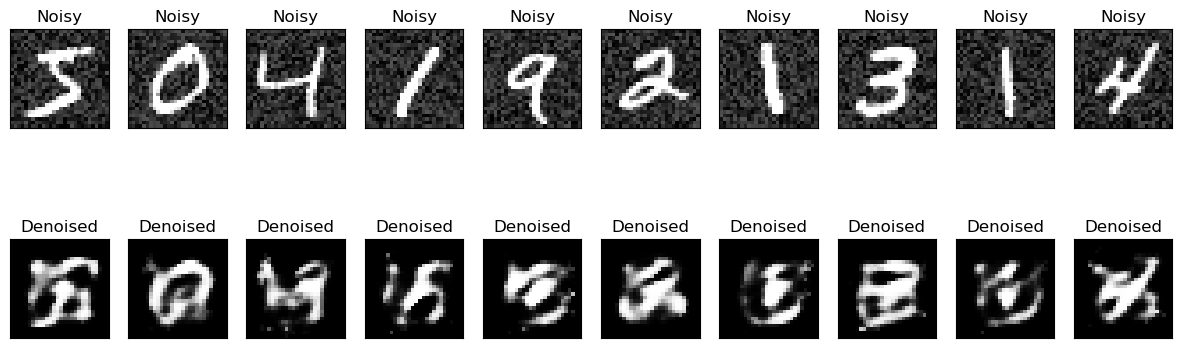

In [107]:
Y_hat = net(X_noise)
fig,axs = plt.subplots(2, 10,figsize=(15,5))
for i in range(10):
    axs[0, i].imshow(X_noise[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[1, i].imshow(Y_hat[i, :].reshape(28, 28).detach(), cmap='gray')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])

for i in range(10):
    axs[0, i].set_title('Noisy')
    axs[1, i].set_title('Denoised')

plt.show()

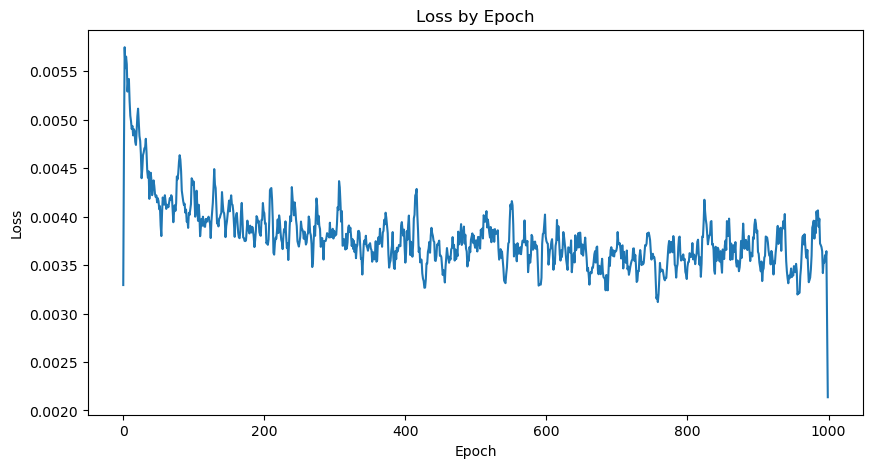

In [117]:
def smooth(x, k=5):
    return np.convolve(x, np.ones(k) / k, mode='same')


plt.figure(figsize=(10, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(smooth(lossses, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss by Epoch')
plt.show()